### Question 1

Q1. Given some sample data, write a program to answer the following: click here to access the required data set
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

#### Q1. a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

**Answer:**

After analyzing the data, I could see that the AOV mentioned here as 3145.13 dollars is the average of the order_amount calculated over the total_items for all the shop_ids. The assumption given in the question is that all these shops sell only one model of shoe. The AOV price of 3145.13 dollars seems particularly quite high. To analyze it further, I calculated the AOV with respect to each shop_id and then took the mean of it. The mean AOV obtained was 407.99 dollars and the 50th percentile AOV is 153 dollars. The max AOV is 25,725 dollars. This means that for some store the max AOV is 25,725 dollars which is pretty high. I felt the need to delve deeper into this. From the plots of order_amount and total_items versus shop_id I can deduce that there are two particular shop_ids (shop_Ids: 42 and 78) for which the order amount is quite high. The total_items count is high for one shop_id (42) though. I needed to check whether the entries seem alright or there might be some fraudulent transaction.

After further analysis, I can see that specific user with user_id = 607 has made the purchases of 704,000 and items_total = 2000. Approximately, the average comes out to be 352 dollars which is quite high than the overall AOV of all the shop_ids but it is equal to the minimum selling price at shop_id = 42 if we exclude user_id 607. Thus, the above instances of high order_amount with equally high items count for shop_id=42 do not appear to be a fraudulent activity. The prices of sneakers in general are on the higher side for this particular shop_id.

For shop_id 78, it is evident that the minimum order amount is 25,725 dollars for just 1 item (sneaker) is very high for a sneaker when compared to other shops. There could not be such deviations. It signals some kind of alarmic / fraud activity here. Also, there is not one single user_Id which might be ordering all these but several different user_ids. If we see, the kind of transactions for these orders is mostly cash or debit. This might also have something to do with fraud debit card usage.

I can deduce from here that shop_id 78 is the anomaly and it should be removed for AOV calculation.
Thus, I calculated the mean AOV after removing the anomaly which is shop_id = 78. 

The mean AOV comes out to be **152.26263 dollars**.

#### Q1. b. What metric would you report for this dataset?

Answer: The metrics that I would propose to report for this dataset are: **Median and/or mode** along with mean AOV as mean value alone gets affected by outliers. For this particular dataset, both the median and mode values came out to be **$153** even without removing the anomaly (shop_id = 78). This shows that even if there are anomalies, the mean value gets deviated whereas median and mode values might give a true picture if combined with the mean AOV. The mean AOV is a quite good measure for businesses, but it should be considered along with median and/or mode.

#### Q1. c. What is its value?

Answer: The proposed metrics (mode and median) have the same value for this dataset: **$153**.

### Analysis for Question 1

In [7]:
import pandas as pd
df = pd.read_csv("2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [8]:
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [9]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [15]:
df.duplicated().sum()

0

In [16]:
df.sort_values(by='created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25
...,...,...,...,...,...,...,...
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
244,245,32,928,202,2,cash,2017-03-30 9:30:28
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40


In [17]:
#the order details are given for the month of March as deduced from the above table

In [18]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [19]:
#there are no duplicate or null/ missing values

mean value of order amount across all shop_id's is $3145.128 which appears to be quite high price per sneaker and hence skewed

To analyze it better, let us calculate AOV for each shop id as it might differ based on customer ordering patterns in a particular region or might give us way to find out the particular orders that have skewed the entire AOV 

In [31]:
revenue_sum_by_shopId = df.groupby(['shop_id'])['order_amount'].agg('sum')
revenue_sum_by_shopId.name = 'revenue_sum'
items_sum_by_shopId = df.groupby(['shop_id'])['total_items'].agg('sum')
items_sum_by_shopId.name = 'items_sum'

In [32]:
##creating a new dataframe for these two columns with respect to shopId
data_by_shopId = pd.concat([revenue_sum_by_shopId, items_sum_by_shopId], axis = 1)
AOV_wrt_shopId = data_by_shopId['revenue_sum']/data_by_shopId['items_sum']
AOV_wrt_shopId.name = 'AOV'
data_by_shopId = pd.concat([revenue_sum_by_shopId, items_sum_by_shopId, AOV_wrt_shopId], axis = 1)
data_by_shopId

,revenue_sum,items_sum,AOV
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data_by_shopId.describe()

,revenue_sum,items_sum,AOV
count,100.00000,100.00000,100.00000
mean,157256.40000,439.36000,407.99000
std,1216217.93695,3396.36611,2557.46291
min,6840.00000,67.00000,90.00000
25%,12930.50000,88.00000,132.75000
50%,14887.50000,100.00000,153.00000
75%,17600.00000,111.25000,168.25000
max,11990176.00000,34063.00000,25725.00000


From the above two tables, we can see that there are total 100 shopIds with a mean AOV of 407.99 and the 50 percentile AOV is 153. The max AOV is 25725 as we can see from the table above. This means that for some store the max AOV is 25725 which is pretty high. We need to delve deeper into this.

In [35]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline

(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <BarContainer object of 10 artists>)

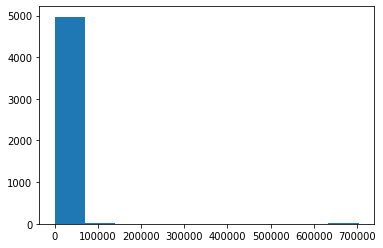

In [54]:
#histplot for revenue_sum
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.hist(df['order_amount'])

(array([4983.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          17.]),
 array([1.0000e+00, 2.0090e+02, 4.0080e+02, 6.0070e+02, 8.0060e+02,
        1.0005e+03, 1.2004e+03, 1.4003e+03, 1.6002e+03, 1.8001e+03,
        2.0000e+03]),
 <BarContainer object of 10 artists>)

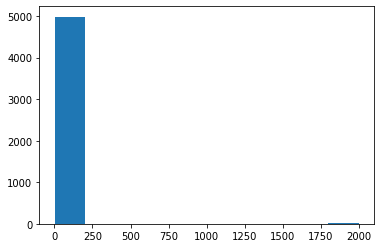

In [53]:
#histplot for items_sum
plt.hist(df['total_items'])

Text(0, 0.5, 'total_items')

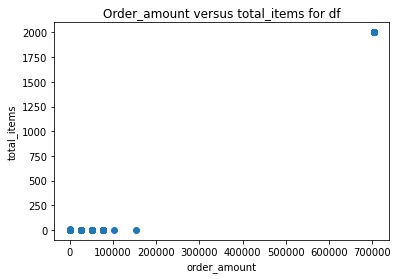

In [52]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.plot(df['order_amount'],df['total_items'],'o')
plt.title("Order_amount versus total_items for df")
plt.xlabel("order_amount")
plt.ylabel("total_items")

Text(0, 0.5, 'Order_amount')

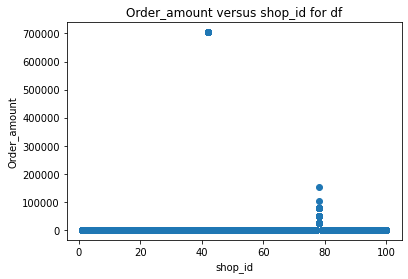

In [57]:
plt.plot(df['shop_id'], df['order_amount'],'o')
plt.title("Order_amount versus shop_id for df")
plt.xlabel("shop_id")
plt.ylabel("Order_amount")

Text(0, 0.5, 'total_items')

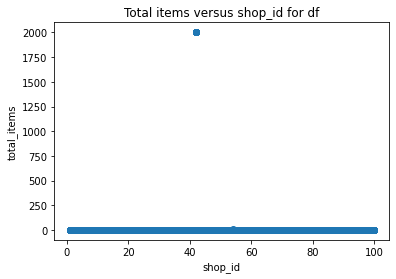

In [58]:
plt.plot(df['shop_id'], df['total_items'],'o')
plt.title("Total items versus shop_id for df")
plt.xlabel("shop_id")
plt.ylabel("total_items")

#### From the above two plots of order_amount and total_items versus shop_id we can see that there are two particular shop_ids for which the order amount is quite high. The total_items count is high only for one shop_id though. We need to check which these two shop_ids are and whether the entries seem alright or there might be some fraudelent transaction.

In [64]:
df.sort_values(by=['order_amount'], ascending= False).head(35)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [63]:
df.sort_values(by=['total_items'], ascending= False).head(35)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


#### From the above two tables, we can see that the order amount value is higher for two shop ids 42 and 78; total_items order is higher for shop id 42 but it is not that high for shop id 78. Let us look at the two shop ids individually

In [68]:
df[df['shop_id'] == 42].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,51.00000,51.00000,51.00000,51.00000,51.00000
mean,2441.92157,42.00000,758.58824,235101.49020,667.90196
std,1484.45680,0.00000,125.99304,334860.64159,951.30864
min,16.00000,42.00000,607.00000,352.00000,1.00000
25%,1366.50000,42.00000,607.00000,352.00000,1.00000
50%,2154.00000,42.00000,770.00000,704.00000,2.00000
75%,3801.00000,42.00000,863.50000,704000.00000,2000.00000
max,4883.00000,42.00000,975.00000,704000.00000,2000.00000


In [70]:
df[df['shop_id'] == 42].sort_values(by=['order_amount'], ascending= False).head(35)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


In [82]:
df[(df['shop_id'] == 42) & (df['user_id']  != 607)].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,34.00000,34.00000,34.00000,34.00000,34.00000
mean,2494.76471,42.00000,834.38235,652.23529,1.85294
std,1443.39692,0.00000,79.34352,358.68168,1.01898
min,41.00000,42.00000,720.00000,352.00000,1.00000
25%,1394.00000,42.00000,770.00000,352.00000,1.00000
50%,2164.00000,42.00000,819.00000,704.00000,2.00000
75%,3852.50000,42.00000,899.50000,704.00000,2.00000
max,4768.00000,42.00000,975.00000,1760.00000,5.00000


From the above table we can see that specific user with user_id = 607 has made the purchases of $704000 and items count = 2000. Approximately, the average comes out to be $352 which is quite high than the overall AOV of all the shop_ids but it is equal to the minimum selling price at shop_id = 42 if we exclude user_id 607 as shown above. 

Thus, the above instances of high order_amount with equally high items count thus not appear to be a fraudalent activity. The prices of sneakers in general are on the higher side for this particular shop_id.

In [84]:
df[df['shop_id'] == 78].sort_values(by=['order_amount'], ascending= False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05


In [83]:
df[df['shop_id'] == 78].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.00000,46.00000,46.00000,46.00000,46.00000
mean,2663.02174,78.00000,867.73913,49213.04348,1.91304
std,1338.52002,0.00000,81.31487,26472.22745,1.02905
min,161.00000,78.00000,707.00000,25725.00000,1.00000
25%,1428.25000,78.00000,812.50000,25725.00000,1.00000
50%,2796.50000,78.00000,866.50000,51450.00000,2.00000
75%,3720.25000,78.00000,935.75000,51450.00000,2.00000
max,4919.00000,78.00000,997.00000,154350.00000,6.00000


From the above table, it is evident that the minimum order amount is $25725 for just 1 item (sneaker) which is very high for a sneaker when compared to other shops. There could not be such deviations. It signals some kind of alarmic / fraud activity here. Also, there is not one single userId which might be ordering all these but several different user_ids. If we see, the kind of transactions for these orders is mostly cash or debit. This might also have something to do with fraud debit card usage. 

I can deduce from here that shop_id 78 is the anomaly and it should be removed for AOV calculation. 

### Calculating AOV again after removing anomaly (shop_id = 78)

In [86]:
new_data_sneakers = data_by_shopId.drop([78])

In [87]:
new_data_sneakers.describe()

,revenue_sum,items_sum,AOV
count,99.00000,99.00000,99.00000
mean,135978.18182,442.90909,152.26263
std,1203553.71548,3413.46415,31.26372
min,6840.00000,67.00000,90.00000
25%,12867.00000,88.00000,132.50000
50%,14835.00000,100.00000,153.00000
75%,17540.00000,111.50000,167.00000
max,11990176.00000,34063.00000,352.00000


 Here, our mean AOV comes out to be $152.26263

Now, after calculating the mean AOV, we can look at other measures as well to see if they turn out equivalent or better.

In [88]:
print("Mean AOV:",new_data_sneakers['AOV'].mean())
print("Median AOV:",new_data_sneakers['AOV'].median())
print("Mode AOV:",new_data_sneakers['AOV'].mode()[0])

Mean AOV: 152.26262626262627
Median AOV: 153.0
Mode AOV: 153.0


All the three measures are almost similar after removing the anomaly (shop_id = 78). Let us look at the three measures if we had not removed the particular shop id

In [89]:
print("Mean AOV:",data_by_shopId['AOV'].mean())
print("Median AOV:",data_by_shopId['AOV'].median())
print("Mode AOV:",data_by_shopId['AOV'].mode()[0])

Mean AOV: 407.99
Median AOV: 153.0
Mode AOV: 153.0


This shows that if we had used another metrics such as median or mode along with mean AOV, then it would have given us a better figure of our AOV across the shop_ids irrespective of the anomalies.

### Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the
challenge. Please use queries to answer the following questions. Paste your queries along with your final
numerical answers below.

#### a. How many orders were shipped by Speedy Express in total?

**Answer: 54**

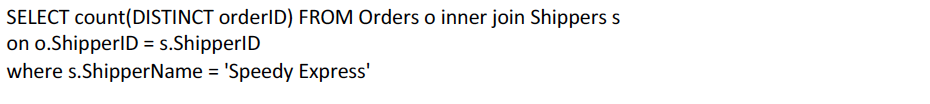

#### b. What is the last name of the employee with the most orders?

**Answer: LastName: Peacock, Total distinct orders: 40 orders**

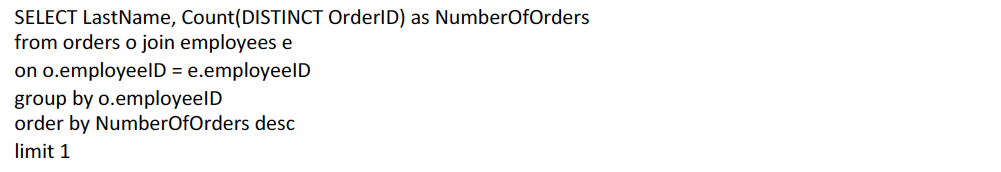

#### c. What product was ordered the most by customers in Germany?

**Answer: Product: Boston Crab Meat with total orders: 160**

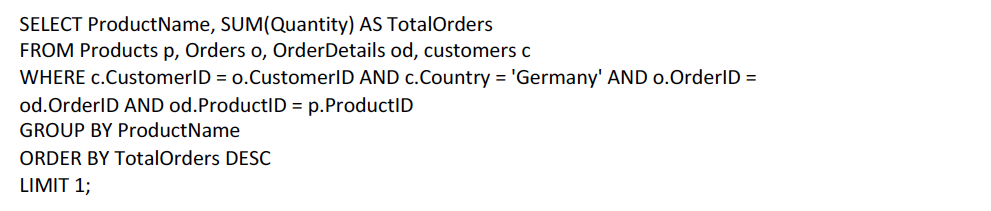

Explanation for Part c: The data was spread across 4 different tables, Instead of using joins individually between two tables, I have included all the required tables into the FROM statement and used the WHERE clause to join them on specific conditions as it was faster.